# Working with Text Data in pandas

In this notebook we will learn how to work with text data in pandas .

First , Pandas provides a set of string functions which make it easy to operate on string data. Most importantly, these functions ignore (or exclude) missing/NaN values.

Let us now see how each operation performs.
* 	**lower()** :  Converts strings in the Series/Index to lower case.
* 	**upper()** :  Converts strings in the Series/Index to upper case.
* 	**len()** :  Computes String length().
* 	**strip()** :  Helps strip whitespace(including newline) from each string in the Series/index from both the sides.
* 	**split(' ')** :  Splits each string with the given pattern.
* 	**cat(sep=' ')** :  Concatenates the series/index elements with given separator.
* 	**get_dummies()** :  Returns the DataFrame with One-Hot Encoded values.
* 	**contains(pattern)** : Returns a Boolean value True for each element if the substring contains in the element, else False..
* 	**replace(a,b)** :  Replaces the value a with the value b.
* 	**repeat(value)** : Repeats each element with specified number of times.
* 	**count(pattern)** : Returns count of appearance of pattern in each element.
* 	**startswith(pattern)** : Returns true if the element in the Series/Index starts with the pattern.
* 	**endswith(pattern)** : Returns true if the element in the Series/Index ends with the pattern.
* 	**find(pattern)** : Returns the first position of the first occurrence of the pattern.
*   **findall(pattern)** :Returns a list of all occurrence of the pattern.
*   **swapcase** : Swaps the case lower/upper.
*   **islower()** : Checks whether all characters in each string in the Series/Index in lower case or not. Returns Boolean
*   **isupper()** :Checks whether all characters in each string in the Series/Index in upper case or not. Returns Boolean.
*   **isnumeric()** :Checks whether all characters in each string in the Series/Index are numeric. Returns Boolean.




lien to Regular experssion tutorial :   https://www.guru99.com/python-regular-expressions-complete-tutorial.html

this tutorial will help you to learn how to creat the pattern of string that you search 

Let us now create a Series and see how all the above functions work.


In [ ]:
import pandas as pd
import numpy as np

s = pd.Series(['Tom', 'William Rick', 'John', 'Alber@t', np.nan, '1234','SteveSmith'])
s

In [ ]:
s.str.lower()

In [ ]:
s.str.upper()

In [ ]:
s = pd.Series(['Tom ', ' William Rick', 'John', 'Alber@t'])
print (s)
print ("After Stripping:")
print (s.str.strip())

In [ ]:
s.str.cat(sep='_')

In [ ]:
s.str.isnumeric()

In [ ]:


time_sentences = ["Monday: The doctor's appointment is at 2:45pm.", 
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

df = pd.DataFrame(time_sentences, columns=['text'])
df

In [ ]:
# find the number of characters for each string in df['text']
df['text'].str.findall()

In [ ]:
# find the number of tokens for each string in df['text']
df['text'].str.split().str.len()

In [ ]:
# find which entries contain the word 'appointment'
df['text'].str.contains('appointment')

In [ ]:
# find how many times a digit occurs in each string
df['text'].str.count(r'\d')

In [ ]:
df['text'].str.findall(r'(\d?\d):(\d\d)')

In [ ]:
# replace weekdays with '???'

df['text']

In [ ]:
# extract the entire time, the hours, the minutes, and the period

df['text'].str.extractall(r'(?P<time>\d:\d{1,2})')

In [0]:
# extract the entire time, the hours, the minutes, and the period with group names
df['text'].str.extractall(r'(?P<time>(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m))')

## Basic NLP Tasks with NLTK 

In [0]:
import nltk

nltk.download('book')
from nltk.book import *

### Counting vocabulary of words

In [0]:
text7

In [0]:
sent7

In [0]:
# how many word in text 7 ? 
len(text7)

In [0]:
# how many unique word in text 7 
len(set(text7))

In [0]:
list(set(text7))[:10]

### Exploratory Data Analysis for Natural Language Processing using WordCloud

**What is WordCloud?**

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud. and now, we will learn how to create a WordCloud . This tool will be quite handy for exploring text data.


In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [0]:
text = '  '.join([j for j in text7 ])
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Great!
Now, let's change some optional arguments of the WordCloud like max_font_size, max_word, and background_color

In [0]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

the argument interpolation="bilinear" in the plt.imshow() make the displayed image appear more smoothly

In [0]:
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize = (15, 15))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Stopwords** are non-content words that primarily has only grammatical function



### Frequency of words with NLTK

In [0]:
dist = FreqDist(text7)
len(dist)

FreqDist : frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome.

In [0]:
vocab1 = dist.keys()
#vocab1[:10] 
# In Python 3 dict.keys() returns an iterable view instead of a list
list(vocab1)[:10]

In [0]:
dist['Vinken']

In [0]:
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 100]
freqwords

### Normalization and stemming

* **Normalization** is to bring all words to lower case 
* **Stemming** is to find the root word or the root from any given word 

In [0]:
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ')
words1

In [0]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in words1]

This is adavantageous because we can now count the frequency of list as the list word occurning it self or in any of its dervation forms 

### Lemmatization

* **lemmatization** is where we want to have words that at come out to be actually meaningful .   

In [0]:
udhr = nltk.corpus.udhr.words('English-Latin1')
udhr[:20]

In [0]:
[porter.stem(t) for t in udhr[:20]] # Still Lemmatization

In [0]:
WNlemma = nltk.WordNetLemmatizer()
[WNlemma.lemmatize(t) for t in udhr[:20]]

### Tokenization

* **Sentence tokenization** is the process of splitting up strings into “sentences”

* **Word tokenization** is the process of splitting up “sentences” into “words”

In [0]:
text11 = "Children shouldn't drink a sugary drink before bed."
text11.split(' ')

In [0]:
nltk.word_tokenize(text11)

In [0]:
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!"
sentences = nltk.sent_tokenize(text12)
len(sentences)

In [0]:
sentences

## Advanced NLP Tasks with NLTK

### POS tagging

In [0]:
nltk.help.upenn_tagset('MD')

In [0]:
text13 = nltk.word_tokenize(text11)
nltk.pos_tag(text13)

In [0]:
text14 = nltk.word_tokenize("Visiting aunts can be a nuisance")
nltk.pos_tag(text14)

In [0]:
nltk.help.upenn_tagset('VBG')

**Prasing sentence structure**
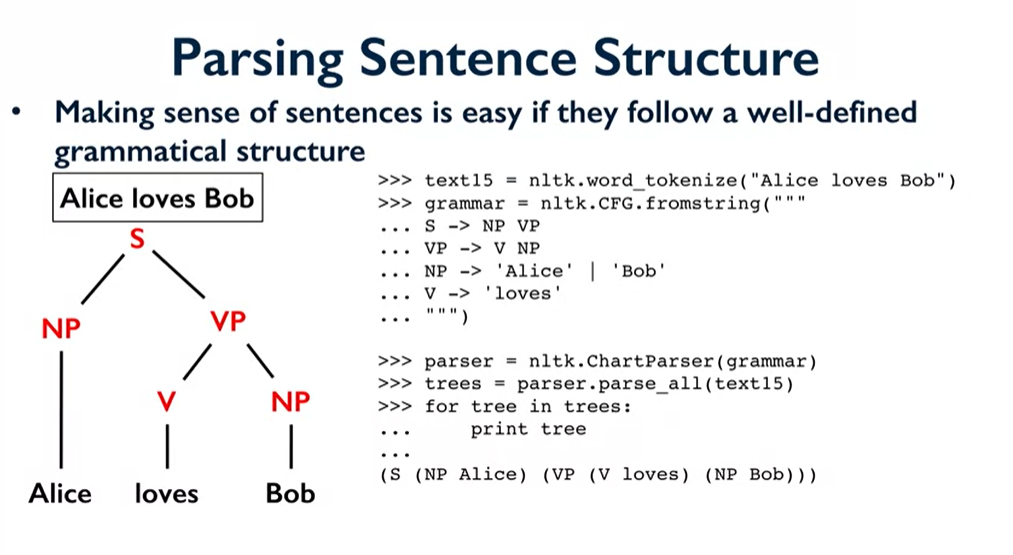

In [0]:
# Parsing sentence structure
text15 = nltk.word_tokenize("Alice loves Bob")
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
NP -> 'Alice' | 'Bob'
V -> 'loves'
""")

parser = nltk.ChartParser(grammar)
trees = parser.parse_all(text15)
for tree in trees:
    print(tree)